# Video Game Satış Analizi

## Veri Analizi Bölümü

In [136]:
# Gerekli kütüphaneler 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [137]:
# Veri Setini df(DataFrame) isimli değişkene yükle.
 
df = pd.read_csv("/kaggle/input/videogamesales/vgsales.csv")

### Verinin Genel Özellikleri 
- 11 adet kolona sahibiz.
- Verideki kolonlar da oyun isimleri, platform, tür, yayıncı ve bölgesel ve küresel satış adetleri var.
- Satış verileri milyon birimi üzerinden yazılmış.
- *Örneğin Duck Hunt oyunu Glabal_sates = 28.31 verisi aslında 28,310,000 kopya satılmış demektir.*
 

In [138]:
# İlk 10 veriyi görelim. Sutünleri ve genel yapıya bu şekilde inceleyebiliriz.
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


##### **df.describe() ile veri setindeki sayısal sütunlar için temel istatistiksel bilgiler elde edilir.**
- Genel olarak veriye bakıldığında "Year" kolonunda ki verilerin bir kısmı eksiktir.(16598 → 16327) 
- Ortalama değerler (mean):
  - Ortalama global satış: 0.54 milyon adet
  - Ortalama NA (Kuzey Amerika) satış: 0.26 milyon adet
- 1.55'in üzerinde standart sapmada en değişken veri global satışlardır.
- Oyunlar satış adeti olarak "0" adete kadar düşmekte. Yani bazı oyunlar ya hiç satmamış ya da bazı bölgelerde satılmamış.
- En çok satan oyun Global_sales kolonunda ve diğer en çok satış ise Kuzey Amerika(NA_Sales)'da

In [139]:
# Veri Setinin Genel Bilgisi
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


####  **df.info() ile toplam veri sayısına, eksik veri sayısına, veri türlerine ve boş olmayan(non-null) veri sayısına ulaşırız.**
- Toplam 16598 veri vardır.
- Veri seti 4 sayısal olmayan veri türüne sahiptir(object).
- Toplam 11 kolon vardır.

In [140]:
# Toplam veri sayısı ve veri türlerini görürüz.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Eksik Veriler Year(Yıl) ve Publisher(Yayıncı) kolonlarında görülmüştür.
* Eksik veriler adet olarak az sayıda olduğundan ve çoğu "Year" kolonunda yer aldığı için bunları analize dahil etmeyeceğim.
* Publisher kolonundaki eksik verileri ise Unknown olarak değiştirip bir kategori içine alacağım.

In [141]:
# Bu komutla eksik veri sayısını çok daha net bir şekilde görürürüz.
df.isnull().sum()


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [142]:
df.iloc[0]

Rank                     1
Name            Wii Sports
Platform               Wii
Year                2006.0
Genre               Sports
Publisher         Nintendo
NA_Sales             41.49
EU_Sales             29.02
JP_Sales              3.77
Other_Sales           8.46
Global_Sales         82.74
Name: 0, dtype: object

In [143]:
# Veride bir değişikliğe gitmeden önce kopyasını alarak orjinal veri setini koruyalım.
dfc = df.copy()

# Eksik verileri tamamen sil (satır)
dfc = dfc.dropna(subset=['Year'])

## Makine Öğrenmesi kısmında DataSeti df['Year'] = df['Year'].fillna(df['Year'].median()) şeklinde tamamladım.

In [144]:
# Tekrar kontrol edelim ve eksik verinin olmadığından emin olalım.
dfc.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [145]:
# Orjinal veride Toplamda 261 veri Unknown olarak doldurulmuş 
df[df['Publisher'] == 'Unknown'].info()


<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 940 to 16581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          203 non-null    int64  
 1   Name          203 non-null    object 
 2   Platform      203 non-null    object 
 3   Year          100 non-null    float64
 4   Genre         203 non-null    object 
 5   Publisher     203 non-null    object 
 6   NA_Sales      203 non-null    float64
 7   EU_Sales      203 non-null    float64
 8   JP_Sales      203 non-null    float64
 9   Other_Sales   203 non-null    float64
 10  Global_Sales  203 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 19.0+ KB


In [146]:
# Publisher verilerindeki eksik olan veriler "unknown" olarak dolduruyorum. Bu makine öğrenmesinde etkili olabilir.
# 1. Eksik yayıncıları 'Unknown' olarak doldurmak
dfc['Publisher'] = dfc['Publisher'].fillna('Unknown')


In [147]:
# Yukarıda ki hatayı almamak için şu şekilde yazarak pandas kütüphanesini kızdırmamış oluruz.
dfc.loc[:, 'Publisher'] = dfc['Publisher'].fillna('Unknown')

* Toplam Unknown: 261


In [148]:
unknown_count = df['Publisher'].value_counts()['Unknown']
print("Unknown Publisher sayısı:", unknown_count)

Unknown Publisher sayısı: 203


In [149]:
# Eksik veri kalmadı
dfc.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [150]:
# Son durumda toplam index 16327 olarak güncellenmiştir.
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16327 non-null  object 
 5   Publisher     16327 non-null  object 
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


#### Kısa Özet
- Öncelikle verinin genel özelliklerine baktım(satır&sutun sayısı,kolon isimleri ve istatistik bilgileri vb.)
- Daha sonra eksik verilerin olup olmadığını kontrol ettim.
- Year ve Publisher kolonlarında eksik bilgilere rastladım.
- Year kolonundaki eksik bilgileri silmeyi tercih ettim bu 271 adet veriyi görmezden gelmem demek.
- Publisher kategorik bir veri olabileceğinden buradaki eksik bilgileri "Unkonwn" olarak doldurdum.
- Kısaca EDA öncesi hafif bir temizlik yaptım.


## EDA(Exploratory Data Analysis) Bölümü

- Çok fazla yayıncı olduğu için bütün isimler iç içe geçti ve grafik oldukça karmaşık bir hale geldi.
- İlk 15 veriye bakmak daha sağlıklı olacak

### En Çok oyun Üreten yayıncılar

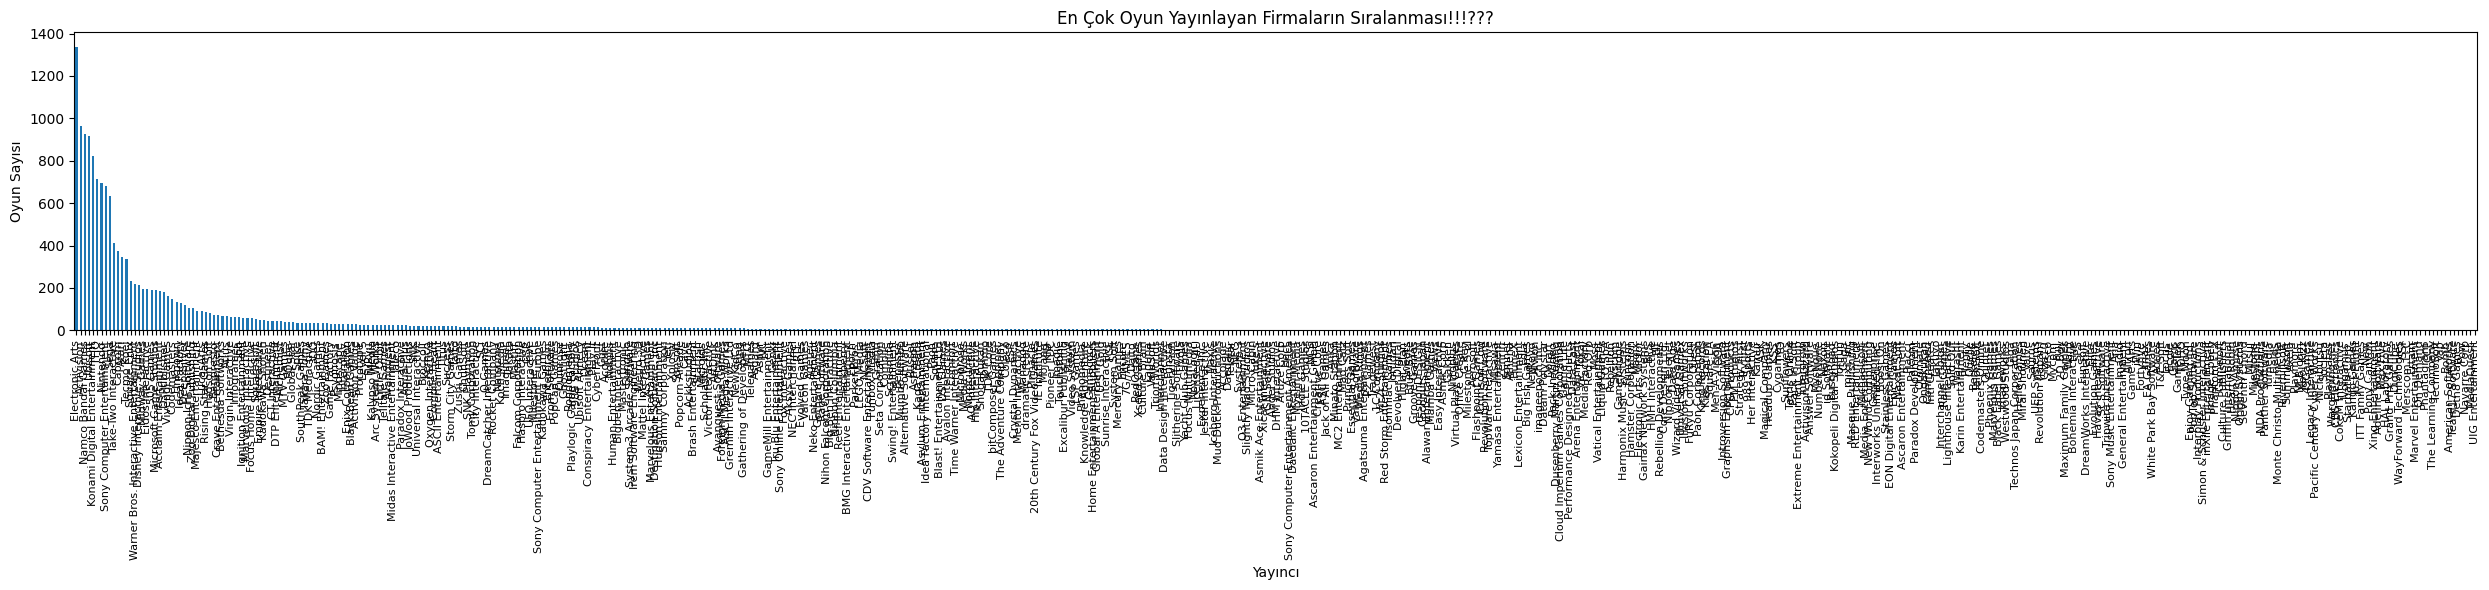

In [151]:
# Bu Şekilde yapılmamalı

ax = dfc['Publisher'].value_counts().plot(kind='bar', figsize=(25, 6))
plt.title('En Çok Oyun Yayınlayan Firmaların Sıralanması!!!???')
plt.xlabel('Yayıncı')
plt.ylabel('Oyun Sayısı')
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()


- EA(Electronic Arts) 1400'e yakın oyunu piyasaya çıkartmış.
- İkinci sırada Activision var. O da yaklaşış 1000 kadar oyunu piyasaya sunmuş.


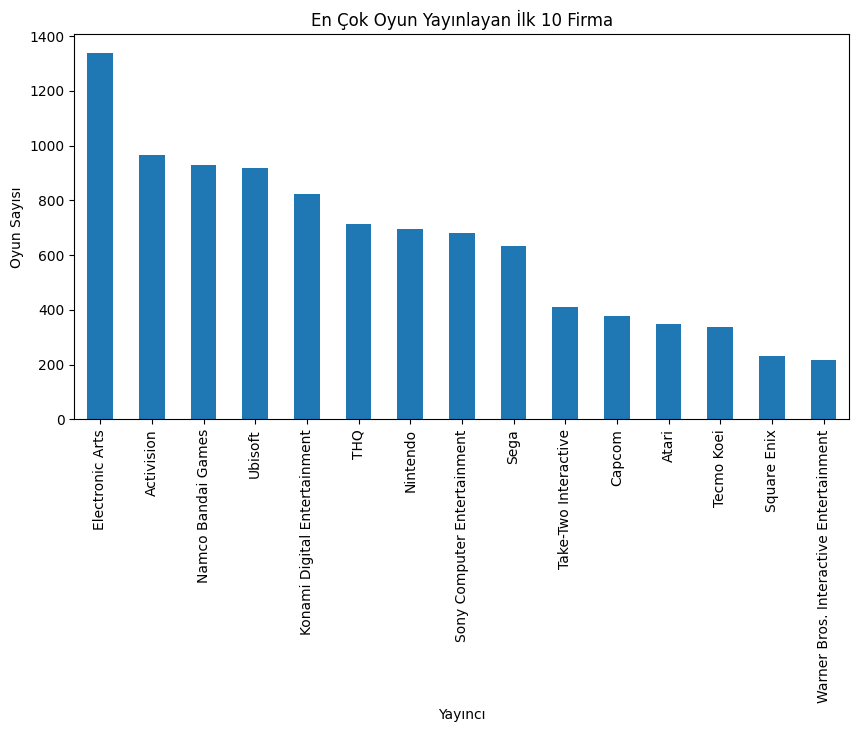

In [152]:
dfc['Publisher'].value_counts().head(15).plot(kind='bar', figsize=(10,5))
plt.title('En Çok Oyun Yayınlayan İlk 10 Firma')
plt.xlabel('Yayıncı')
plt.ylabel('Oyun Sayısı')
plt.xticks(rotation=90)
plt.show()

#### Ortalama bir yayıncı ne kadar oyun piyasaya sunmuş?

In [153]:
publisher_counts = dfc['Publisher'].value_counts()
average_games_per_publisher = publisher_counts.mean()
print(f"Ortalama bir yayıncı {average_games_per_publisher:.2f} oyun çıkarmıştır.")

Ortalama bir yayıncı 28.35 oyun çıkarmıştır.


* Bu ortalama değeri(28.35) grafikte görelim tabi ilk 15 yayıncıyla kıyaslarsam bu değer ilk 15 için çok düşük kalacak
bu sepeble ilk 50 yayıncaya bakalım

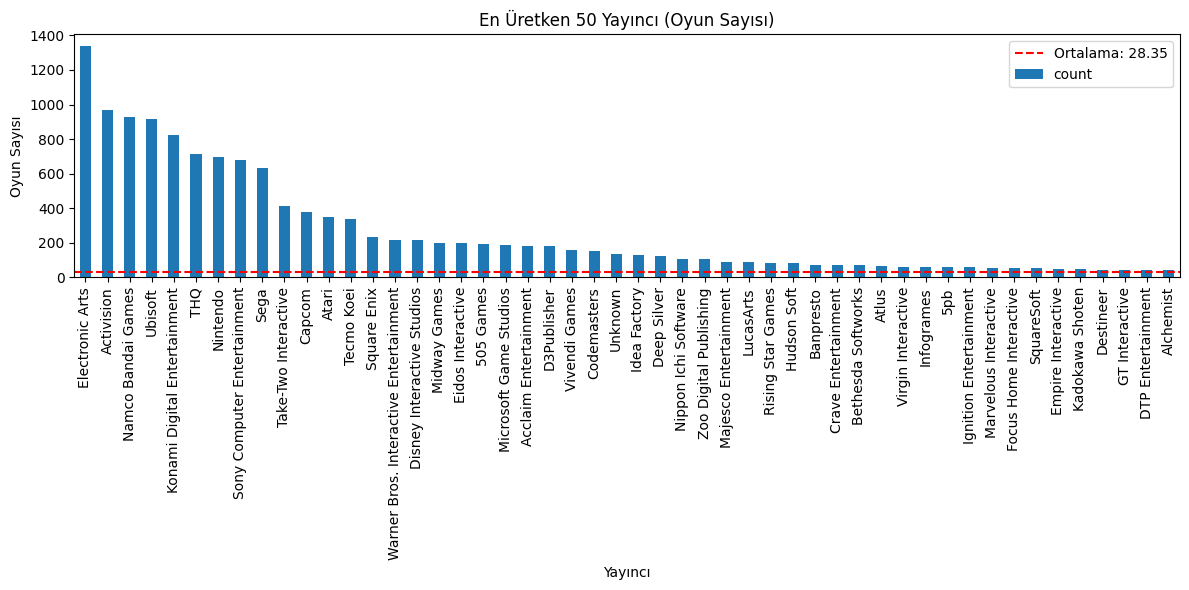

In [154]:
plt.figure(figsize=(12,6))
publisher_counts.head(50).plot(kind='bar')
plt.title('En Üretken 50 Yayıncı (Oyun Sayısı)')
plt.xlabel('Yayıncı')
plt.ylabel('Oyun Sayısı')
plt.xticks(rotation=90)
plt.axhline(y=average_games_per_publisher, color='red', linestyle='--', label=f'Ortalama: {average_games_per_publisher:.2f}')
plt.legend()
plt.tight_layout()
plt.show()


- Neredeyse ilk 50 yayıncı bile ortalamadan fazla oyunu piyasaya sunmuş.

#### Ortalama bir tür kaç farklı oyun içeriyor?

In [155]:
genre_counts = dfc['Genre'].value_counts()
average_games_per_genre = genre_counts.mean()

print(f"Ortalama bir tür {average_games_per_genre:.2f} farklı oyun içeriyor.")


Ortalama bir tür 1360.58 farklı oyun içeriyor.


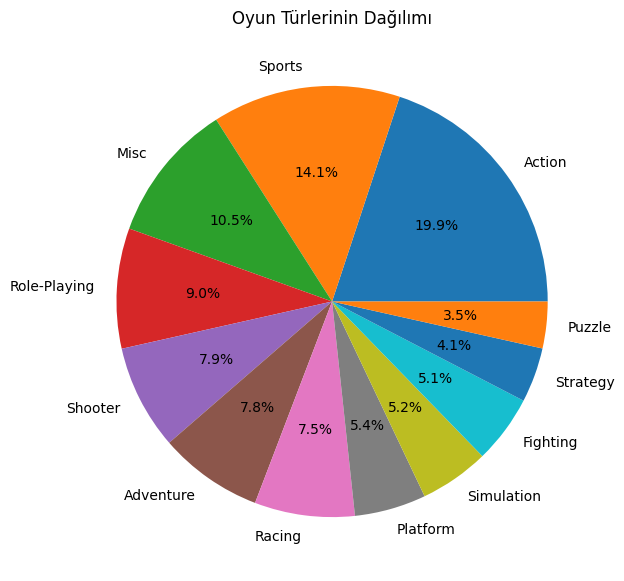

In [156]:
dfc['Genre'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(7,7))
plt.title('Oyun Türlerinin Dağılımı')
plt.ylabel('');


- En fazla aksiyon kategorisinde oyun piyasaya çıkmış.
- Spor oyunlarının da oldukça populer olduğu görülmüştür.
- En az piyasaya çıkan oyun türleri ise en azdan başlayarak Puzzle, Strateji ve Dövüş oyunları olmuştur.


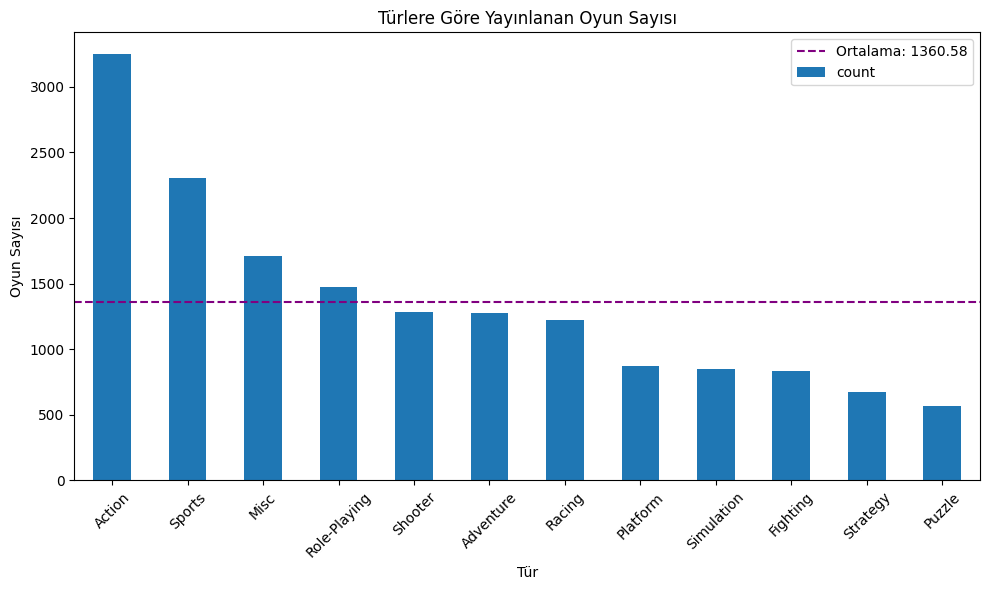

In [157]:
fig, ax = plt.subplots(figsize=(10,6))
genre_counts.plot(kind='bar', ax=ax)

ax.set_title('Türlere Göre Yayınlanan Oyun Sayısı')
ax.set_xlabel('Tür')
ax.set_ylabel('Oyun Sayısı')

# Ortalama çizgisi
ax.axhline(y=average_games_per_genre, color='purple', linestyle='--',
           label=f'Ortalama: {average_games_per_genre:.2f}')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [158]:
import warnings
warnings.filterwarnings("ignore")
# jupyter notebook uyarı mesajları verir. hata değildir ama bazı uyarılarda bulunur. bunları kapamak için yazılmış kod

##### Türlere Göre Global Satış
- Platform oyunları en çok satışa ulaşan oyun olmuştur.
- ikinci sırada Shooter türündeki oyunlar en çok satışa ulaşmıştır.

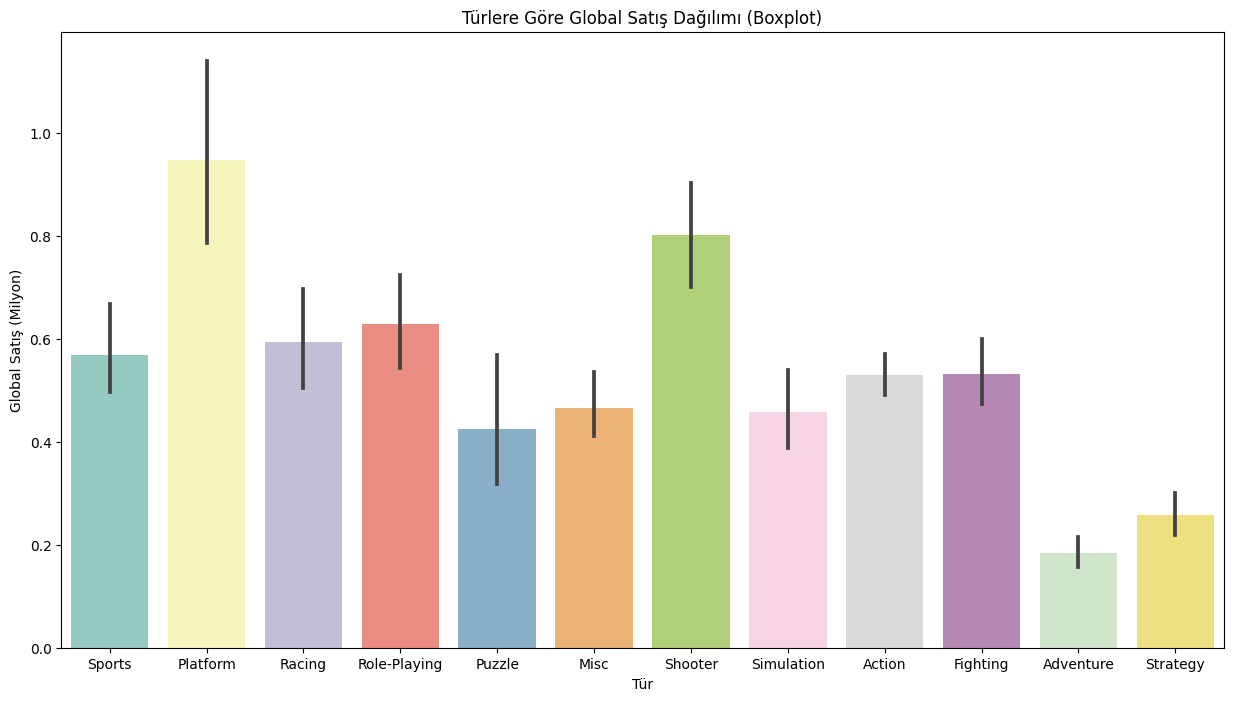

In [159]:
plt.figure(figsize=(15,8))
sns.barplot(data=dfc, x='Genre', y='Global_Sales', palette='Set3')
plt.title('Türlere Göre Global Satış Dağılımı (Boxplot)')
plt.xlabel('Tür')
plt.ylabel('Global Satış (Milyon)');



### Kuzey Amerika'nın Türlere Göre Satış Grafiği

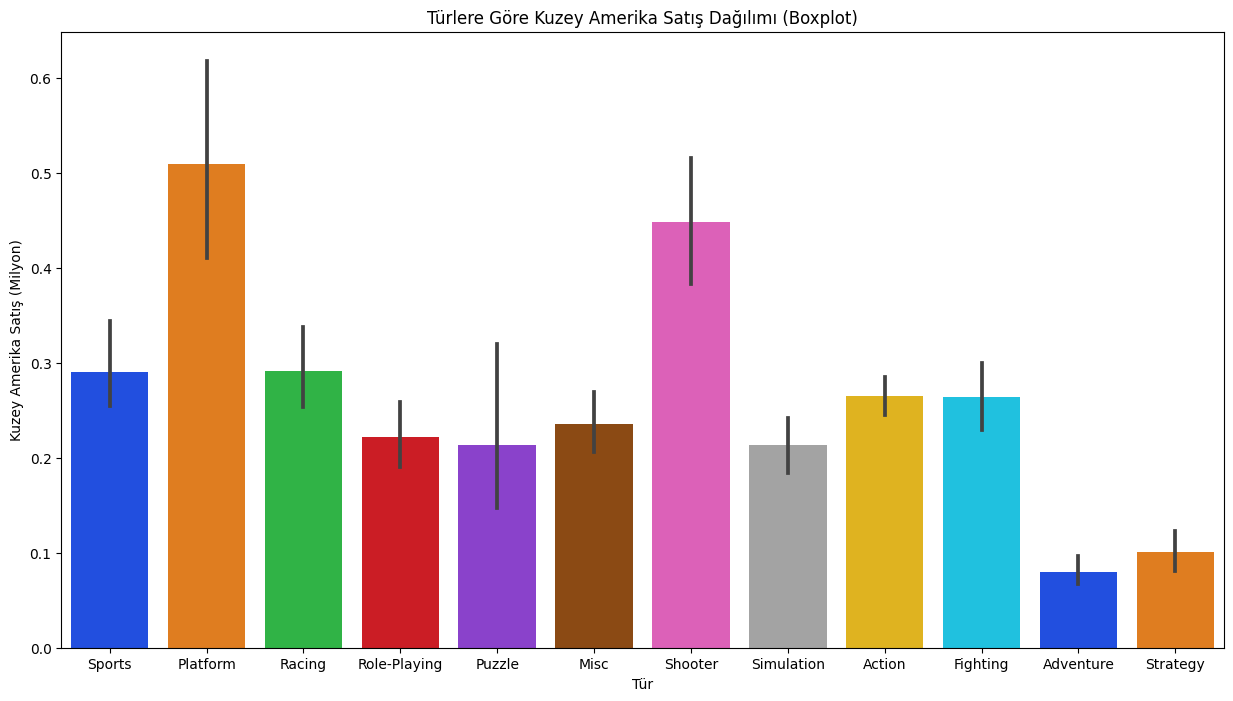

In [160]:
plt.figure(figsize=(15,8))
sns.barplot(data=dfc, x='Genre', y='NA_Sales', palette='bright')
plt.title('Türlere Göre Kuzey Amerika Satış Dağılımı (Boxplot)')
plt.xlabel('Tür')
plt.ylabel('Kuzey Amerika Satış (Milyon)')
plt.show()


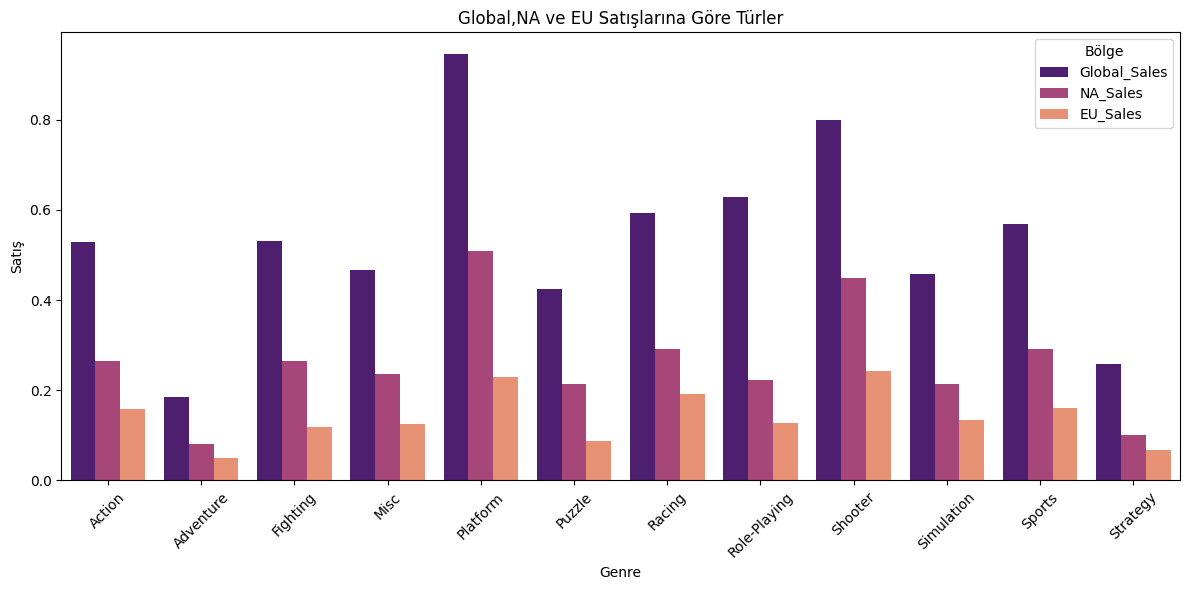

In [161]:
plt.figure(figsize=(12,6))
dfc_grouped = dfc.groupby('Genre')[['Global_Sales', "NA_Sales", 'EU_Sales']].mean().reset_index()

dfc_melted = dfc_grouped.melt(id_vars='Genre', var_name='Bölge', value_name='Satış')
sns.barplot(data=dfc_melted, x='Genre', y='Satış', hue='Bölge', palette='magma')

plt.title('Global,NA ve EU Satışlarına Göre Türler')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Oyun Adeti ve Küresel Satışlar Açısından Oyun Türlerini İnceleme

In [162]:
genre_summary = dfc.groupby('Genre').agg({
    'Name': 'count',               # Oyun sayısı
    'Global_Sales': 'mean'         # Ortalama satış
}).rename(columns={'Name': 'Oyun_Adedi', 'Global_Sales': 'Ortalama_Satış'})

# Ortalama satışa göre sırala
genre_summary = genre_summary.sort_values('Ortalama_Satış', ascending=False)
genre_summary


,Oyun_Adedi,Ortalama_Satış
Genre,,
Platform,876,0.946518
Shooter,1282,0.800468
Role-Playing,1471,0.628035
Racing,1226,0.592798
Sports,2304,0.568247
Fighting,836,0.531160
Action,3253,0.529628
Misc,1710,0.466444
Simulation,851,0.458472


- Oyun türlerine göre piyasaya sürülen oyun sayısı ile ortalama satış adetleri karşılaştırıldığında şu sonuçlara ulaşılabilir:
- Platform türü, piyasaya çıkan oyun sayısı düşük olmasına rağmen ortalama satış açısından oldukça başarılıdır. Bu durum, türde yer alan bazı ikonik oyunların(Mario gibi) satış ortalamasını yukarı çektiğini gösterebilir.
- Aksiyon oyunları, çok fazla üretilmiş olmasına rağmen bu yoğunluğa oranla ortalama satış açısından daha sınırlı başarı göstermektedir.

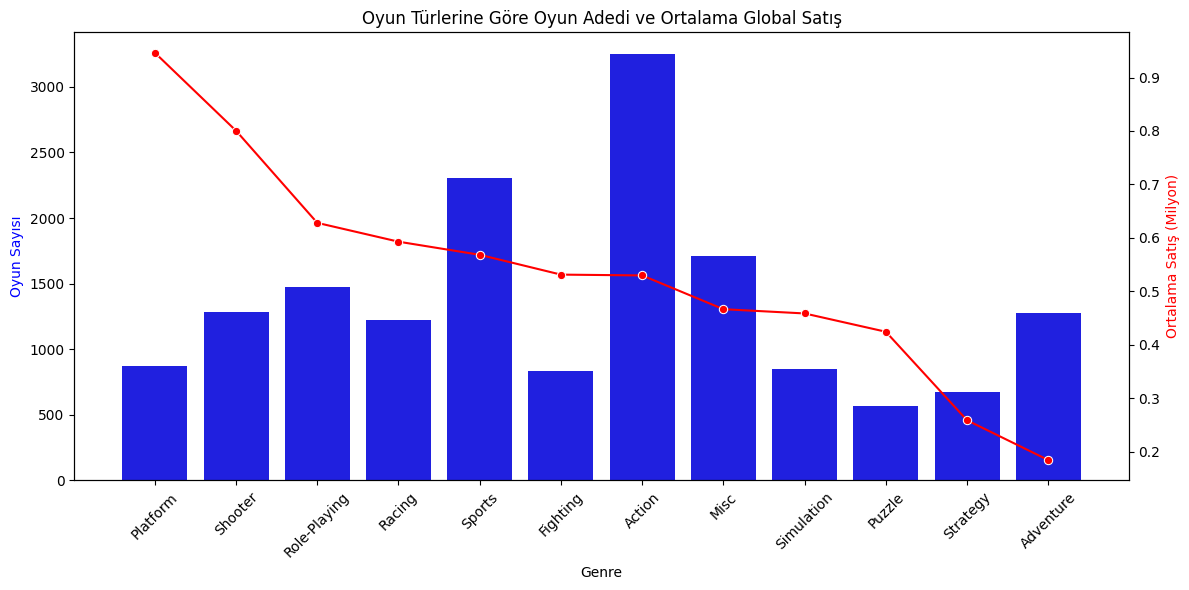

In [163]:
# Normalize etmeden aynı grafik üzerine iki eksen çizmek için:
fig, ax1 = plt.subplots(figsize=(12,6))

# İlk eksen: oyun adedi
sns.barplot(x=genre_summary.index, y=genre_summary['Oyun_Adedi'], ax=ax1, color='blue')
ax1.set_ylabel('Oyun Sayısı', color='blue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# İkinci eksen: ortalama satış
ax2 = ax1.twinx()
sns.lineplot(x=genre_summary.index, y=genre_summary['Ortalama_Satış'], ax=ax2, color='red', marker='o')
ax2.set_ylabel('Ortalama Satış (Milyon)', color='red')

plt.title('Oyun Türlerine Göre Oyun Adedi ve Ortalama Global Satış')
plt.tight_layout()
plt.show()


### Yıllara Göre Satışları İncelenmesi

In [164]:
yearly_sales = dfc.groupby('Year')['Global_Sales'].sum()

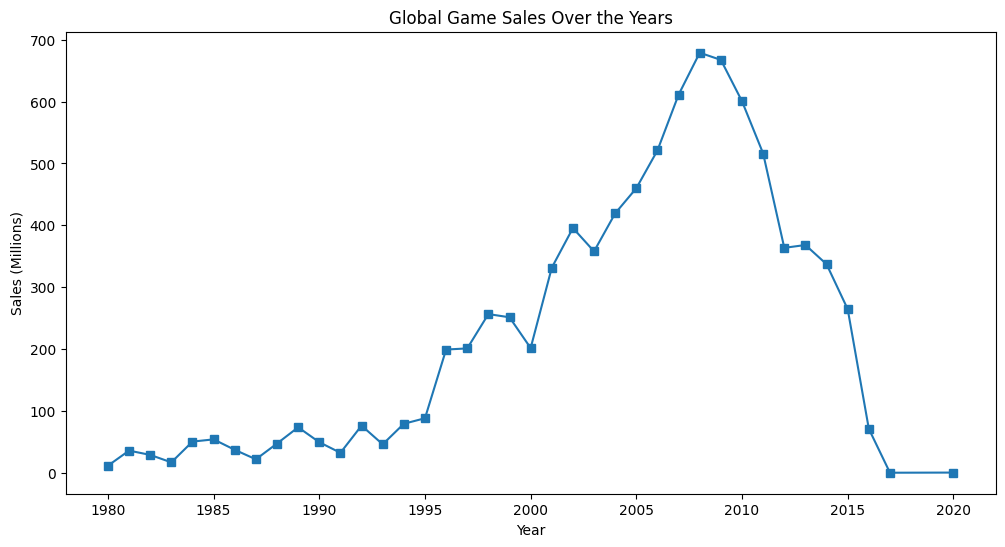

In [165]:
plt.figure(figsize=(12,6))
yearly_sales.plot(kind="line", marker="s")
plt.title("Global Game Sales Over the Years")
plt.ylabel("Sales (Millions)")
plt.xlabel("Year")
plt.show()

- Satışlar özetle 2008-2010 yılları arasında oldukça fazla gerçekleşmiş.
- 2000'li yıllarla beraber satışlar yükselişe geçmiş ve özellikle 2010'lu yıllardan sonra düşüşe geçtiği gözlemlenmiştir.

#### Hangi platformun ne kadar oyunu var?

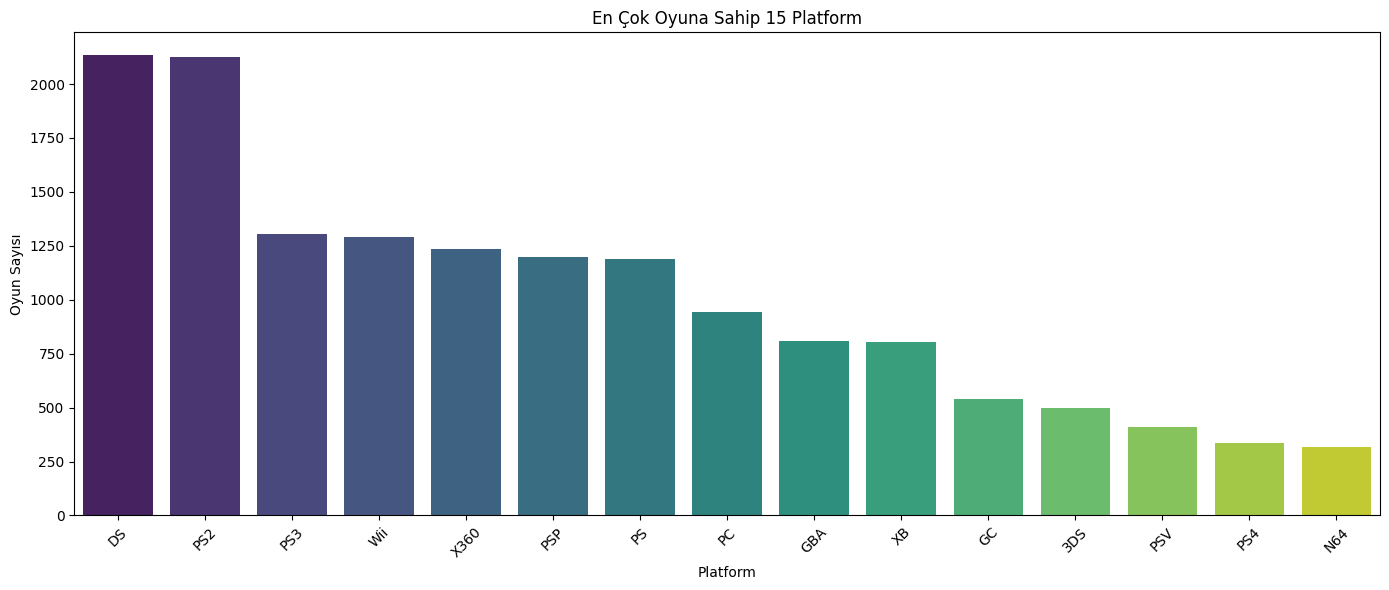

In [166]:
plt.figure(figsize=(14,6))
top_platforms = dfc['Platform'].value_counts().head(15)

sns.barplot(x=top_platforms.index, y=top_platforms.values, palette="viridis")

plt.title('En Çok Oyuna Sahip 15 Platform')
plt.xlabel('Platform')
plt.ylabel('Oyun Sayısı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- En çok oyuna sahip ilk 2 platform "DS" ve diğeri ise "PS2".
- Nintendo DS ve Sony Playstation 2 oyun sektörünü domine etmiştir.

### Küresel Satışlar ile Platformların Karşılaştırılması

In [167]:
platform_sales = dfc.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

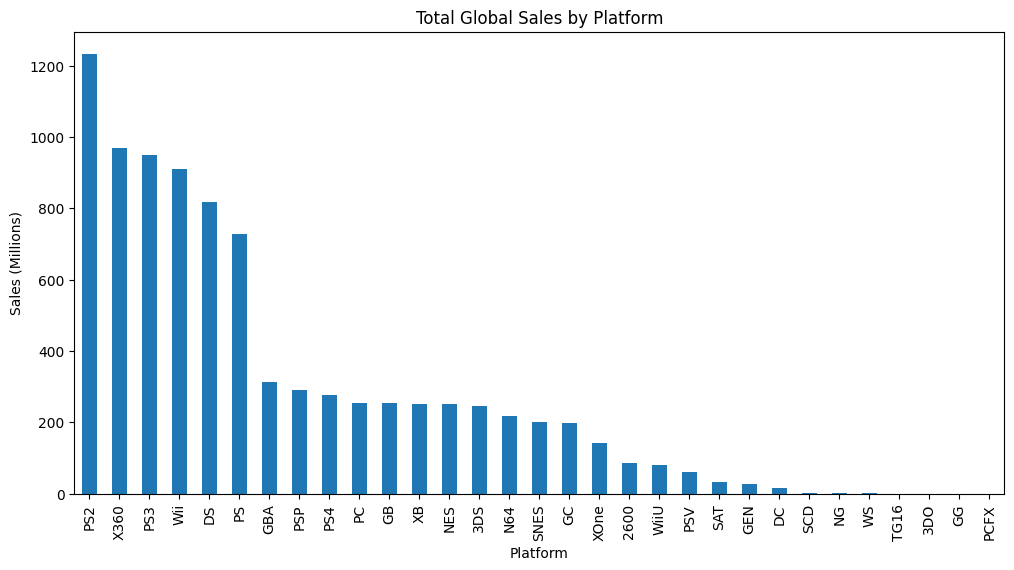

In [168]:
plt.figure(figsize=(12,6))
platform_sales.plot(kind="bar", title="Total Global Sales by Platform")
plt.ylabel("Sales (Millions)")
plt.show()

- PS2 oldukça fazla oyun satarak küresel satışlarda önemli bir yere sahip olmuştur.
- PS2'yi xbox360 ve PS3 platformları küresel satışlarda takip etmektedir.

### Küreselde en çok satan ilk 10 oyun

In [169]:
df.drop(columns="Rank", inplace=True) # Rank sutununun veri setinden çıkar.
top_ten_games = df.sort_values("Global_Sales", ascending=False)

In [170]:
top_ten_games.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


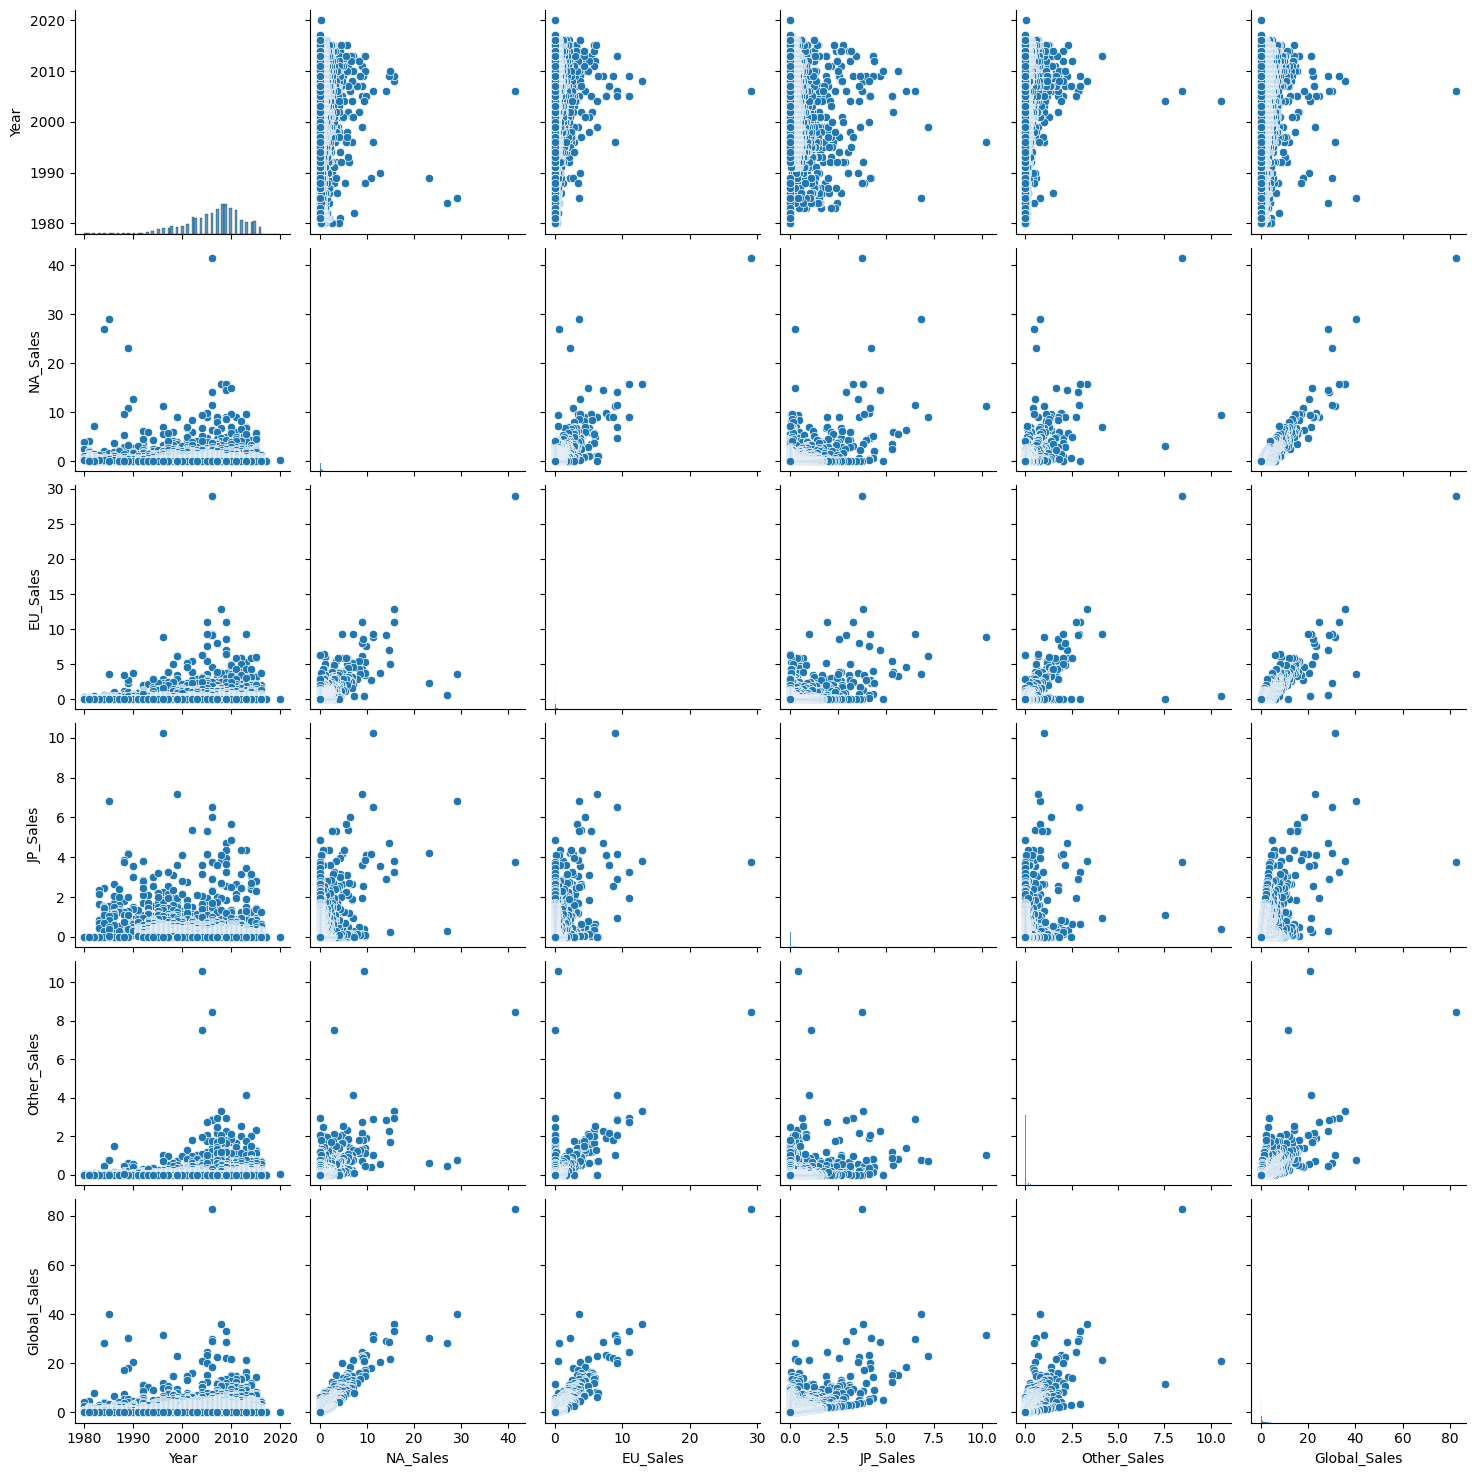

In [171]:
sns.pairplot(top_ten_games)

### Grafik Yorumu 
- Global_Sales ile diğer satış sütunları (NA_Sales, EU_Sales, JP_Sales, Other_Sales) arasında güçlü doğrusal ilişkiler var gibi görünüyor. Mantıklı çünkü Global_sales diğer satışların toplamı olabilir. 
- Year değişkeninde belli dönemlerde yoğun veri gözüküyor.
- Bazı değişkenlerde (örneğin NA_Sales, Other_Sales) uç noktalar (outlier) açıkça gözüküyor.

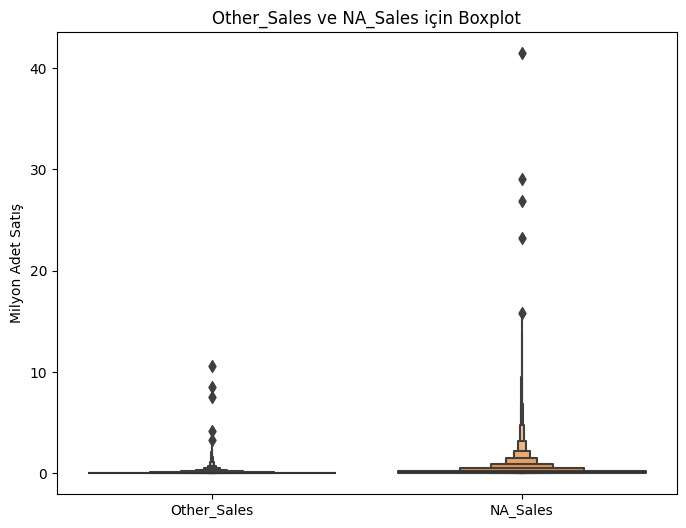

In [172]:

plt.figure(figsize=(8, 6))
sns.boxenplot(data=df[["Other_Sales", "NA_Sales"]])
plt.title("Other_Sales ve NA_Sales için Boxplot")
plt.ylabel("Milyon Adet Satış")
plt.show() # Daha net şekilde görünmekte

#### Not : Log Dönüşümü yaparak etkisi azaltılabilir

In [173]:
df["Log_NA_Sales"] = np.log1p(df["NA_Sales"])    
df["Log_Other_Sales"] = np.log1p(df["Other_Sales"])

Text(0.5, 1.0, 'Log Dönüşümlü Satış Verileri')

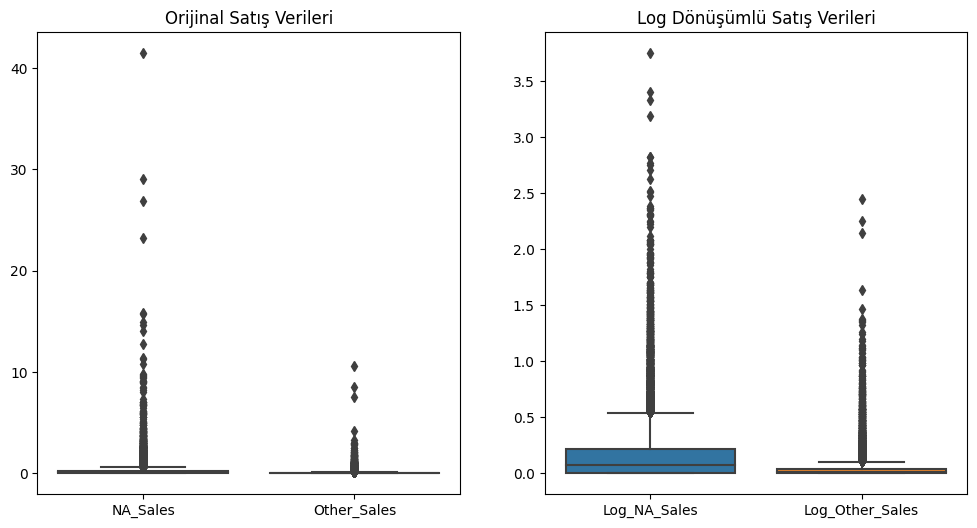

In [174]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Önceki dağılım
sns.boxplot(data=df[["NA_Sales", "Other_Sales"]], ax=axes[0])
axes[0].set_title("Orijinal Satış Verileri")

# Log dönüşümlü dağılım
sns.boxplot(data=df[["Log_NA_Sales", "Log_Other_Sales"]], ax=axes[1])
axes[1].set_title("Log Dönüşümlü Satış Verileri")

- Sezgisel olarakta işe yaramaması beklenen bir durumdu. Çünkü aykırı veriler çok yüksek uç değerlere sahip. 
- Son olarak uç değerler gerçeği yansıttığını düşündüğüm için Winsorization işlemi uygulamak daha doğru olcağını düşünüyorum.

#### Winsorization

In [175]:
from scipy.stats.mstats import winsorize

df["NA_Sales_Winsor"] = winsorize(df["NA_Sales"], limits=[0.01, 0.01])
df["Other_Sales_Winsor"] = winsorize(df["Other_Sales"], limits=[0.01, 0.01])

Text(0.5, 1.0, 'Winsor Dönüşümlü Satış Verileri')

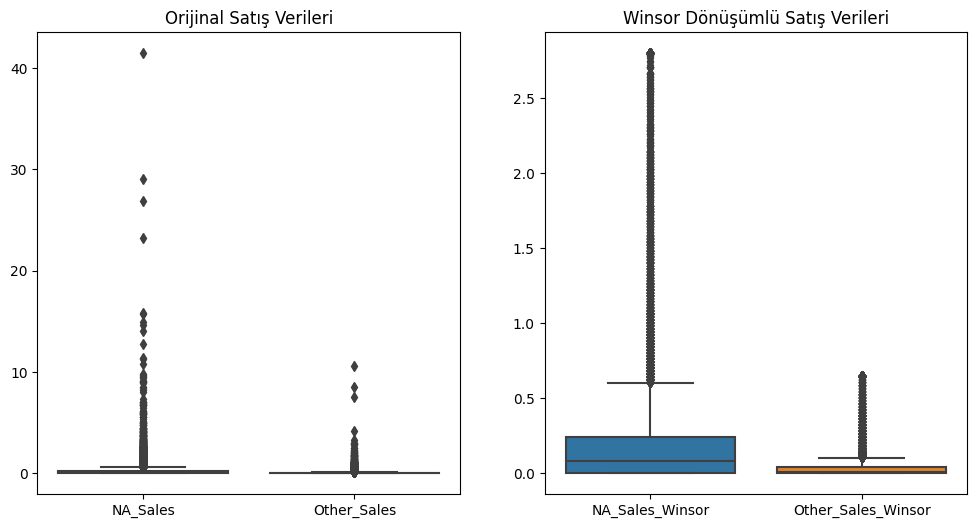

In [176]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Önceki dağılım
sns.boxplot(data=df[["NA_Sales", "Other_Sales"]], ax=axes[0])
axes[0].set_title("Orijinal Satış Verileri")

# Log dönüşümlü dağılım
sns.boxplot(data=df[["NA_Sales_Winsor", "Other_Sales_Winsor"]], ax=axes[1])
axes[1].set_title("Winsor Dönüşümlü Satış Verileri")

#### Çok daha doğru bir çıktı aldım. Hala uç değerler var ancak daha kontrollü sınırlar içinde

In [177]:
# Daha düzenli bir görünüm için
print(top_ten_games[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Global_Sales']].head(10))

                        Name Platform    Year         Genre Publisher  \
0                 Wii Sports      Wii  2006.0        Sports  Nintendo   
1          Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2             Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3          Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4   Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   
5                     Tetris       GB  1989.0        Puzzle  Nintendo   
6      New Super Mario Bros.       DS  2006.0      Platform  Nintendo   
7                   Wii Play      Wii  2006.0          Misc  Nintendo   
8  New Super Mario Bros. Wii      Wii  2009.0      Platform  Nintendo   
9                  Duck Hunt      NES  1984.0       Shooter  Nintendo   

   Global_Sales  
0         82.74  
1         40.24  
2         35.82  
3         33.00  
4         31.37  
5         30.26  
6         30.01  
7         29.02  
8         28.62  
9         28.31 

### Satış üzerinden kolerasyon

In [178]:
# "object" içeren değerleri çıkartmak için o değerleri öğrenmek.
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16327 non-null  object 
 5   Publisher     16327 non-null  object 
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


- Featureslardan "Publisher", "Genre" , "Platform", "Name", "Rank" özellikleri çıkarttım. Satış üzerine analiz yapmak istiyorum.

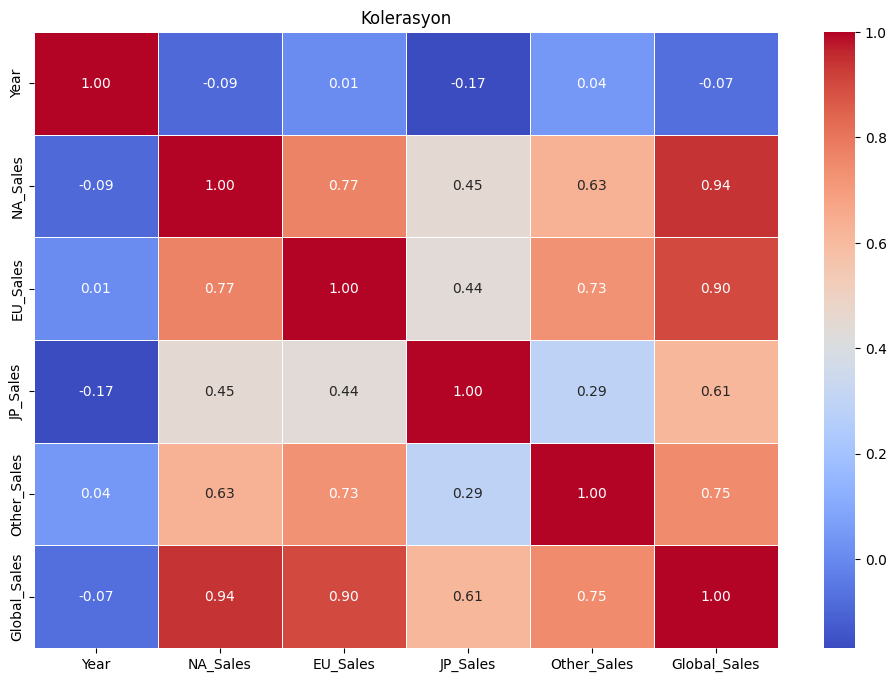

In [179]:
# Tüm Featuresları içeren bir heatmap
dfc.drop(["Publisher", "Genre" , "Platform", "Name", "Rank"], axis=1, inplace=True)
corr_matrix = dfc.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Kolerasyon')
plt.show()

#### Satış değerlerine heatmap'te yakından bakalım yakından bakalım

In [180]:
# Satış içeren kolonlara ulaşmak istedim.
dfc.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000
mean,2006.406443,0.265415,0.147554,0.078661,0.048325,0.540232
std,5.828981,0.821591,0.508766,0.311557,0.189885,1.565732
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [181]:
# ayrı bir değişkene tanımladım.
sales_col  = ["NA_Sales",	"EU_Sales",	"JP_Sales",	"Other_Sales" ,	"Global_Sales"]
print(dfc[sales_col].describe())

           NA_Sales      EU_Sales      JP_Sales   Other_Sales  Global_Sales
count  16327.000000  16327.000000  16327.000000  16327.000000  16327.000000
mean       0.265415      0.147554      0.078661      0.048325      0.540232
std        0.821591      0.508766      0.311557      0.189885      1.565732
min        0.000000      0.000000      0.000000      0.000000      0.010000
25%        0.000000      0.000000      0.000000      0.000000      0.060000
50%        0.080000      0.020000      0.000000      0.010000      0.170000
75%        0.240000      0.110000      0.040000      0.040000      0.480000
max       41.490000     29.020000     10.220000     10.570000     82.740000


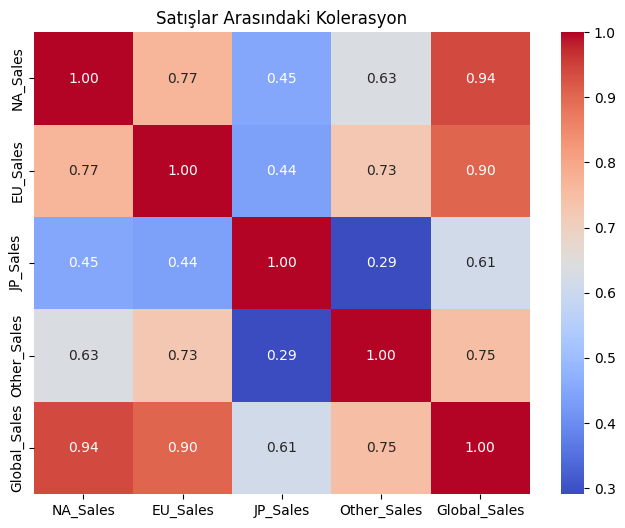

In [182]:
plt.figure(figsize=(8,6))
sns.heatmap(dfc[sales_col].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Satışlar Arasındaki Kolerasyon")
plt.show()

### Analiz

- Küresel satışlar(Global_Sales) ve Kuzey Amerika(NA_Sales) arasında oldukça yüksek bir kolerasyon vardır.
- Yine Küresel Satışlarla, Avrupa Satışları(EU_Sales) arasında da yüksek bir kolerasyon vardır.
- Japonya'daki satışlar(JP_Sales) diğer satışları en az etkileyen özelliktir.


Not: Makine öğrenmesi aşamasına geçmeden önce "Year" kategorsindeki eksik verileri tamamen kaldırmıştım. Bu sebeple bu verilerin öğrenme aşamasındaki etkisine bakmak için önce dfc yani 127 satırın silinmiş haliye daha sonrada ortalama bir değerle doldurulmuş haliyle modeli eğiteceğim. Bu sayede her iki veri setinde aldığım sonuçları daha net bir şekilde görmüş olacağım. Sezgisel olarak aradaki farkın çok az olacağını tahmin ediyorum.

### Verileri Hazırlama

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                16598 non-null  object 
 1   Platform            16598 non-null  object 
 2   Year                16327 non-null  float64
 3   Genre               16598 non-null  object 
 4   Publisher           16540 non-null  object 
 5   NA_Sales            16598 non-null  float64
 6   EU_Sales            16598 non-null  float64
 7   JP_Sales            16598 non-null  float64
 8   Other_Sales         16598 non-null  float64
 9   Global_Sales        16598 non-null  float64
 10  Log_NA_Sales        16598 non-null  float64
 11  Log_Other_Sales     16598 non-null  float64
 12  NA_Sales_Winsor     16598 non-null  float64
 13  Other_Sales_Winsor  16598 non-null  float64
dtypes: float64(10), object(4)
memory usage: 1.8+ MB


In [184]:
# Her iki veri setinde eksik Publisher verileri "Unknown" olarak doldurduk.
df['Publisher'] = df['Publisher'].fillna('Unknown')

df = df.drop('Name', axis=1)

df =  pd.get_dummies(df, columns=['Platform', 'Genre', 'Publisher'], drop_first=True)

In [185]:
df.head(3)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Log_NA_Sales,Log_Other_Sales,NA_Sales_Winsor,Other_Sales_Winsor,...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
0,2006.0,41.49,29.02,3.77,8.46,82.74,3.749269,2.247072,2.8,0.65,...,False,False,False,False,False,False,False,False,False,False
1,1985.0,29.08,3.58,6.81,0.77,40.24,3.403860,0.570980,2.8,0.65,...,False,False,False,False,False,False,False,False,False,False
2,2008.0,15.85,12.88,3.79,3.31,35.82,2.824351,1.460938,2.8,0.65,...,False,False,False,False,False,False,False,False,False,False


In [186]:
# 127 verinin veri setinden çıkarılmış hali
df_clean = df.dropna(subset=['Year'])


# Verileri medyan ile doldurur.
df_fill = df.copy()
df_fill['Year'] = df_fill['Year'].fillna(df['Year'].median())

In [187]:
df_clean.isnull().sum()

Year                              0
NA_Sales                          0
EU_Sales                          0
JP_Sales                          0
Other_Sales                       0
                                 ..
Publisher_id Software             0
Publisher_imageepoch Inc.         0
Publisher_inXile Entertainment    0
Publisher_mixi, Inc               0
Publisher_responDESIGN            0
Length: 628, dtype: int64

In [188]:
df_fill.isnull().sum()

Year                              0
NA_Sales                          0
EU_Sales                          0
JP_Sales                          0
Other_Sales                       0
                                 ..
Publisher_id Software             0
Publisher_imageepoch Inc.         0
Publisher_inXile Entertainment    0
Publisher_mixi, Inc               0
Publisher_responDESIGN            0
Length: 628, dtype: int64

In [189]:
# Gerekli kütüphanelerin ekleyelim 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [190]:
# Karşılaştırma kolay olsun diye RandomForestRegressor analizini içeren bir fonksiyon yazdım.
def train_and_evaluate(dataframe, label='Global_Sales'):
    X = dataframe.drop(label, axis=1)
    y = dataframe[label]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    
    return mse
    

#### Year sutunundaki eksik verileri silmek az da olsa sonucu etkiledi.

In [191]:
mse_sil = train_and_evaluate(df_clean)
mse_doldur = train_and_evaluate(df_fill)

print(f"Veri silinerek eğitilen modelin MSE değeri: {mse_sil:.4f}")
print(f"Veri doldurularak eğitilen modelin MSE değeri: {mse_doldur:.4f}")


Veri silinerek eğitilen modelin MSE değeri: 0.5171
Veri doldurularak eğitilen modelin MSE değeri: 0.5075


### Linear Regression

In [192]:
# Gerekli Kütüphanelerin Kurulumu
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [193]:
X = df[["NA_Sales", "EU_Sales"]]  # Girdiler
y = df["Global_Sales"]  # Hedef değişken

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [195]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [196]:
y_pred = model.predict(X_test)


In [197]:
print("R² Skoru:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))


R² Skoru: 0.9607791858467296
MAE: 0.11614588313634695
MSE: 0.08417541256273166
RMSE: 0.29012999252530175


## Sonuçları Özetlersek 

- Model, hedefteki varyansın %96'sını açıklıyor. 
- Ortalama tahmin hatası ≈ 116 bin adet satış. 
- Ortalama sapma ≈ 290 bin satış. Ölçek göz önüne alındığında çok büyük bir sayı değil.

In [198]:
y_train_pred = model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_pred)

print("Eğitim R²:", train_r2)
print("Test R²:", test_r2)

Eğitim R²: 0.9662002492058429
Test R²: 0.9607791858467296


#### Sonuç
- 	Çok küçük bir fark var → overfitting yok 
- Katsayılarına bakarak hangisi daha fazla etkilemiş öğrenebiliriz.


In [199]:
pd.DataFrame(model.coef_, X.columns, columns=["Katsayı"])

,Katsayı
NA_Sales,1.168505
EU_Sales,1.336120


- Bu rakamlara göre EU satışları global satışları daha fazla etkilemiştir.

#### Küresel satışlara tüm satışların etkisi!?

In [200]:
# Gerekli Kütüphanelerin Kurulumu
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [201]:
X = df[["NA_Sales", "EU_Sales", "Other_Sales", "JP_Sales"]]  # Girdiler
y = df["Global_Sales"]  # Hedef değişken

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [203]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [204]:
y_pred = model.predict(X_test)

In [205]:
print("R² Skoru:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))


R² Skoru: 0.9999871842386355
MAE: 0.002953768189472494
MSE: 2.7505089413524038e-05
RMSE: 0.005244529474940916


In [206]:
y_train_pred = model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_pred)

print("Eğitim R²:", train_r2)
print("Test R²:", test_r2)

Eğitim R²: 0.9999892789366615
Test R²: 0.9999871842386355


#### Sonuç
- Global_Sales zaten diğer 4 satış bölgesinin toplamı olduğu için birbirine çok yakın tahminleirin çıkması oldukça normal.
- Bu şekilde bir sonuç üretmek çok anlamlı olmaz.

## Hangi Oyun Türü Globalde Başarılı 

### Tür, platform, publisher gibi bilgilerine sahip olarak → oyunun yüksek satış yapıp yapmayacağını tahmin edebilir miyiz?

### 1-) Satışları Sınıflandırmak 

In [207]:
df = pd.read_csv("/kaggle/input/videogamesales/vgsales.csv") # Veri setini tekrar import et
df.drop(columns="Rank", inplace=True) # Rank verisine gerek yok bu sebeple baştan çıkardım.

In [208]:
# Eksik Verileri Tamamla
df['Publisher'] = df['Publisher'].fillna('Unknown')
df['Year'] = df['Year'].fillna(df['Year'].median())

In [209]:
df.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

#### Global satışlar outlier değerler içerdiği için log dönüşümü ile bu farkları "sıkıştır"dım

<Axes: >

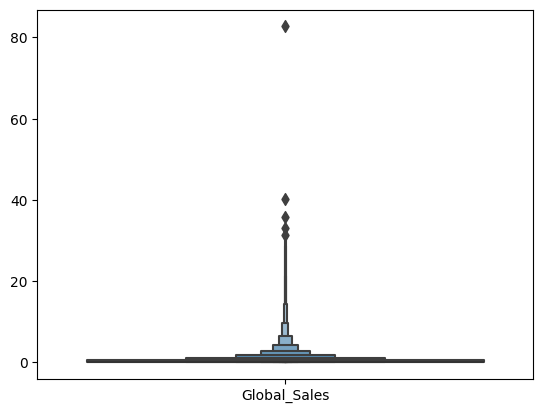

In [210]:
sns.boxenplot(data=df[["Global_Sales"]])

In [211]:
df["Log_Global_Sales"] = np.log1p(df["Global_Sales"])

In [212]:
# Bu oyun başarlı mı?
df["High_Sales"] = df["Log_Global_Sales"] > df["Log_Global_Sales"].median()

In [213]:
df["High_Sales"].head(2)

0    True
1    True
Name: High_Sales, dtype: bool

<Axes: >

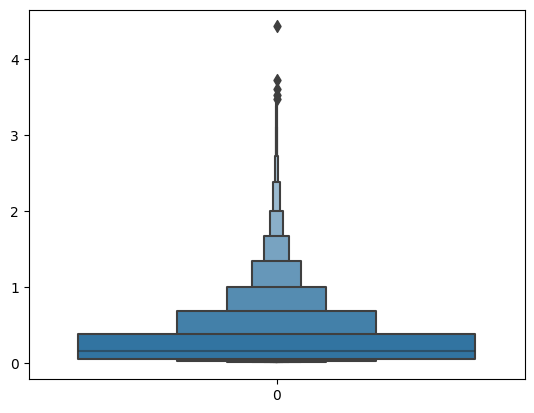

In [214]:
sns.boxenplot(df["Log_Global_Sales"]) # Outliter etkisini azalttık

### 2-) Başarılı Oyunu Tahmin Etme (Classification Pipeline)

In [215]:
# Kütüphaneleri import
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix


In [216]:
features = ["Genre", "Platform", "Publisher", "Year"]
target = "High_Sales"

X = df[features]
y = df[target]


In [217]:
preprocessor = ColumnTransformer(
    [("cat", OneHotEncoder(handle_unknown="ignore"), ["Genre", "Platform", "Publisher"])]
)


In [218]:
pipe = make_pipeline(
    preprocessor,
    RandomForestClassifier(random_state=42)
)


In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)


In [220]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

       False       0.73      0.68      0.70      1673
        True       0.70      0.75      0.72      1647

    accuracy                           0.71      3320
   macro avg       0.71      0.71      0.71      3320
weighted avg       0.71      0.71      0.71      3320

Confusion Matrix:
 [[1137  536]
 [ 416 1231]]


## Raporun Analizi

---------------------------------------------------------------
- 	Model tüm veride %71 doğrulukla tahmin yapıyor.
-  “Başarılı” dediği oyunların %70’i gerçekten başarılı ve “Başarısız” dediği oyunların %73’ü gerçekten başarısız.
- F1-Scoru her iki değer içinde tahminlemenin başarılı olduğunu söylüyor.
---------------------------------------------------------------

- Başarısız oyunları %68 oranla doğru tahmin etmiş.
- Başarılı oyunları %75 oranla doğru tahmin etmiş.
---------------------------------------------------------------

* 1137 oyun doğru şekilde başarısız olarak tahmin edilmiş.

* 1231 oyun doğru şekilde başarılı olarak tahmin edilmiş.

* 536 oyun başarısız olduğu halde başarılı tahmin edilmiş (false positive).

* 416 oyun başarılı olduğu halde başarısız tahmin edilmiş (false negative).

---------------------------------------------------------------

## Başarıya En Çok Etki Eden Faktörler

In [221]:
# Pipeline'dan encoder'ı al
ohe = pipe.named_steps["columntransformer"].named_transformers_["cat"]
encoded_features = ohe.get_feature_names_out(["Genre", "Platform", "Publisher"])

# Sayısal değişkenleri ekle
all_features = list(encoded_features) 

In [222]:
model = pipe.named_steps["randomforestclassifier"]
importances = model.feature_importances_

feat_imp_df = pd.DataFrame({
    "Feature": all_features,
    "Importance": importances
})

# En yüksekten küçüğe sırala
feat_imp_df.sort_values(by="Importance", ascending=False, inplace=True)


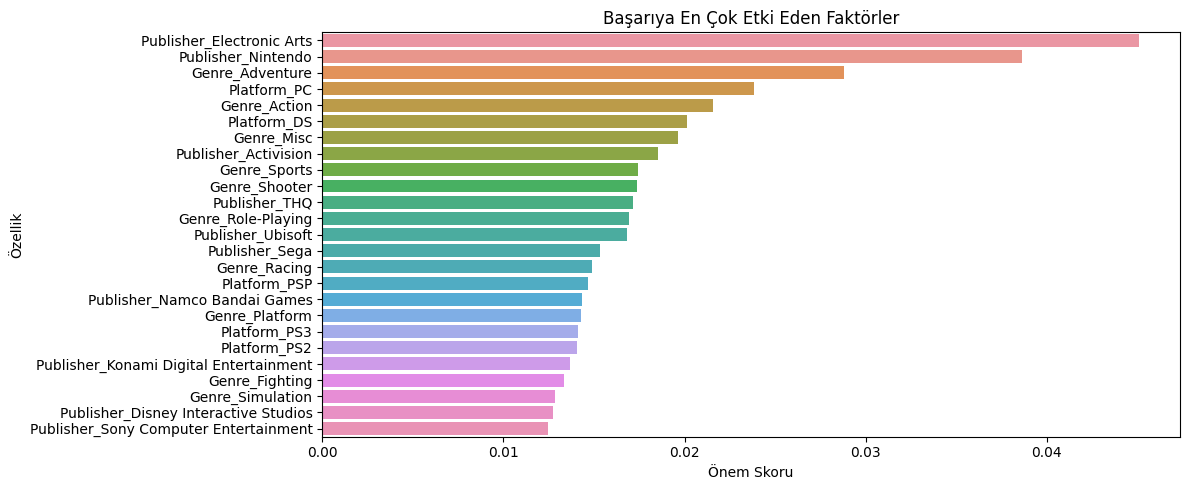

In [223]:
plt.figure(figsize=(12, 5))
sns.barplot(data=feat_imp_df.head(25), x="Importance", y="Feature")
plt.title("Başarıya En Çok Etki Eden Faktörler")
plt.xlabel("Önem Skoru")
plt.ylabel("Özellik")
plt.tight_layout()
plt.show()

# Sonuç

#### **Makine öğrenmesiyle elde edilen sonuçlara göre, özellikle Electronic Arts ve Nintendo gibi büyük yayıncıların oyunları başarıyı önemli ölçüde belirlemektedir. Ayrıca Adventure, Action ve Shooter türleriyle PC, DS gibi platformlarda çıkan oyunlar model tarafından daha yüksek başarı olasılığına sahip olarak sınıflandırılmıştır.**

#### **Tabi bu analiz Yıl(Year) faktörünü de ele alıp öyle değerlendirmek gerekmektedir.Çünkü şuanda PSP(Temmuz 2021 resmi store kapandı) platformuna oyun çıkartsanız resmi olarak satışınız mümkün olmayabilir. Bazı platformlara firmalar,artık destek vermemektedir. Bu sebeple değerlendirme yaparken özellikle yayıncı(Publisher) ve oyun kategorsine(Genre) bakmak daha anlamlı sonuçlar vermesi açısından önemlidir.**

